# PYTHON FOR DATA ANALYSIS TP4 : WebScraping


# 1) Four other Python important concepts

## 1.1) Map, Filter

Ces fonctions python permettent d'appliquer des fonctions a des listes sans avoir a utiliser des boucles. 
- Map renvoie une liste de même taille que la liste originale
- Filter renvoie la sous liste qui matche un critère.
- Les deux peuvent être remplacées par des comprehension list
- Ce sont les fonctions typiques de la programmation fonctionnelle

## 1.1.1) MAP permet d'appliquer une fonction sur chaque élément d'une liste
## (renvoie une liste de meme taille )

In [2]:
# EN UTILISANT UNE COMPREHENSION LIST
func_deux_fois  = lambda param : param*2
zero_dix_huit = [func_deux_fois(x) for x in range(10)]
zero_dix_huit

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [23]:
# JE VEUX APPLIQUER UNE FONCTION SUR CHAQUE ITEM DE LA LISTE SOURCE ET RENVOYER UNE NOUVELLE LISTE
r = []
for _ in zero_dix_huit:
    r.append(_+1)
r

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [24]:
# EN UNE LIGNE AVEC MAP 
r = list( map ( lambda x: x+1, zero_dix_huit ))
r

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [25]:
# EQUIVALENT A ... UNE COMPREHENSION LIST !
r = [ x+1 for x in zero_dix_huit ]
r

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [26]:
# compter le nombre de fois qu'il y a un True, possibilité 1
r.count(True)

1

## 1.1.2) FILTER permet de filtrer une liste sur une condition 
## (renvoie la sous liste qui passe la condition)

In [27]:
# filter() renvoie un itérateur
iterateur = filter(lambda x: x>10, zero_dix_huit)
liste     = list(iterateur)
liste

[12, 14, 16, 18]

In [28]:
# ITERATEUR ?
# c'est un objet dont on peut parcourir les valeurs une à une
# str, tuple, list, dict et set sont des itérables dont on peut obtenir un itérateur avec iter
# un intérateur garde en mémoire l'index du dernier élément accédé

mylist = ["pomme", "tournevis", "haricot"]
myit = iter(mylist)

print(next(myit))
print(next(myit))
print(next(myit))


pomme
tournevis
haricot


In [29]:


iterateur = filter(lambda x: x>10, zero_dix_huit)
print(next(iterateur))
print(next(iterateur))


12
14


In [30]:
# L'appel à list() permet de récupérer la liste des éléments non encore accédés d'un itérateur
print(list(iterateur))

[16, 18]


In [31]:
iterateur = filter(lambda x: x>10, zero_dix_huit)
print(next(iterateur))
print(list(iterateur))
print(list(iterateur))

12
[14, 16, 18]
[]


In [32]:
chaine = 'hello world'
iterateur = iter(chaine)
print(next(iterateur))
print(next(iterateur))
print(next(iterateur))
print(list(iterateur))

h
e
l
['l', 'o', ' ', 'w', 'o', 'r', 'l', 'd']


In [33]:
# Et comme pour MAP, on peut aussi utiliser une COMPREHENSION LIST..
liste= [x for x in zero_dix_huit if x>10]
liste

[12, 14, 16, 18]

## 1.2) F-strings

Les F strings sont une nouvelle façon d'afficher des expressions et variables python dans du texte

In [34]:
# Python offers many ways to display variables and expressions in a string literal  :

temp="25"
ville="Veracruz"


# CONCATENATION :

print("Il fait "+temp+" degrés à "+ville)

Il fait 25 degrés à Veracruz


In [35]:
# %-FORMATTED STRINGS

print( "Il fait %s degrés à %s " % (temp,ville) ) 

Il fait 25 degrés à Veracruz 


In [36]:
# string.format

print("Il fait {} degrés à {}".format(temp,ville))

Il fait 25 degrés à Veracruz


In [37]:
# F-strings are a recent Python Enhancement. They came with Python 3.6,in 2015  
# They make formatting easier to write and read
# They always start with an "f" before the quotation mark

print( f"Il fait {temp} degrés à {ville}" )

Il fait 25 degrés à Veracruz


In [38]:
# You can put any valid Python expression inside the braces :
print( f"Il fait {2*temp} degrés à {ville}" )

Il fait 2525 degrés à Veracruz


In [39]:
print( f"Il fait {2*int(temp)} degrés à {ville.upper()}" )

Il fait 50 degrés à VERACRUZ


## 1.3) "Attraper" les erreurs avec try, except
Quand votre code "plante", les message d'erreur est parfois abscons..

Utilisez Try et Except pour empêcher le programme de planter et executer  du code spécifique en cas d'erreur

Nous allons ici terminer l'analyse du fichier prénom, tout en apprenant à utiliser try/except, sed, la gestion des NaN par Pandas,

In [165]:
# https://www.insee.fr/fr/statistiques/fichier/2540004/nat2019_csv.zip

import pandas as pd
nat= pd.read_csv("datasets/nat2018.csv",sep=";")
nat

,sexe,preusuel,annais,nombre
0,1,A,1980,3
1,1,A,1998,3
2,1,A,XXXX,21
3,1,AADAM,2009,4
4,1,AADAM,2014,3
...,...,...,...,...
636469,2,ÖZLEM,2013,3
636470,2,ÖZLEM,2014,5
636471,2,ÖZLEM,2015,3
636472,2,ÖZLEM,2016,3


In [166]:
# JE VEUX GARDER LA DERNIERE LETTRE DE CHAQUE PRENOM DANS UNE Series
def get_last_letter(x):
        return(x[-1])

last_letters = nat[nat.sexe==2].preusuel.map(get_last_letter) 

# MAIS ....

TypeError: 'float' object is not subscriptable

In [167]:
# Les message d'erreur est très clair, c'est x[-1] qui fait planter le programme
# Isolons ce code dans un TRY

def get_last_letter(x):
    try:
      _ = x[-1]
    except:
        print("An exception occurred")
        print(f"le fautif est {x}")
        return
    else:
        return(x[-1])

last_letters = nat[nat.sexe==2].preusuel.map(get_last_letter) 



An exception occurred
le fautif est nan
An exception occurred
le fautif est nan
An exception occurred
le fautif est nan


In [43]:
nat['type']=nat.preusuel.apply(type)
#nat[nat.type.str.contains("float")]
# https://fr.wikipedia.org/wiki/NaN

# un NaN est différent de lui même, c'est à ça qu'on les reconnait : 
nat[ nat.preusuel != nat.preusuel ]


,sexe,preusuel,annais,nombre,type
536476,2,NaN,1982,3,<class 'float'>
536477,2,NaN,2003,3,<class 'float'>
536478,2,NaN,XXXX,25,<class 'float'>


In [44]:
# Voila pquoi le msg d'erreur était "'float' object is not subscriptable"
# subscriptable veut dire qu'on peut utiliser [] pour accéder à une sous partie de l'objet : list, strings...
# Allons voir directement dans le fichiers autour des lignes indiquées
! sed -n 536476,536482p datasets/nat2018.csv
#! "c:\Program Files (x86)\GnuWin32\bin\"sed.exe -n 536476,536490p datasets/nat2018.csv

In [169]:
# les prénoms NA sont  interprétés comme NaN ..
# https://stackoverflow.com/questions/33952142/prevent-pandas-from-interpreting-na-as-nan-in-a-string
# We learn that pandas keeps a default list of strings to be interpreted as nan
# avec ces nouveaux paramètres passés à read_csv, nous empêchons pandas d'interprêter les "NA" en NaN
    
nat= pd.read_csv("datasets/nat2018.csv",sep=";",keep_default_na=False, na_values=['_'])
nat   

,sexe,preusuel,annais,nombre
0,1,A,1980,3
1,1,A,1998,3
2,1,A,XXXX,21
3,1,AADAM,2009,4
4,1,AADAM,2014,3
...,...,...,...,...
636469,2,ÖZLEM,2013,3
636470,2,ÖZLEM,2014,5
636471,2,ÖZLEM,2015,3
636472,2,ÖZLEM,2016,3


In [170]:
nat[nat.preusuel != nat.preusuel ]

,sexe,preusuel,annais,nombre


In [171]:
nat[nat.preusuel == "NA" ]

,sexe,preusuel,annais,nombre
536476,2,NA,1982,3
536477,2,NA,2003,3
536478,2,NA,XXXX,25


In [172]:
def get_last_letter(x):
        return(x[-1])

last_letters = nat.preusuel.map(get_last_letter) 

In [173]:
# On renomme la série pour avoir le bon nom de colonne plus tard (pas preusuel)
last_letters.name="last_letter"
last_letters

0         A
1         A
2         A
3         M
4         M
         ..
636469    M
636470    M
636471    M
636472    M
636473    M
Name: last_letter, Length: 636474, dtype: object

In [50]:
table = nat.pivot_table('nombre', index=last_letters,
                              columns=['sexe', 'annais'], aggfunc=sum, fill_value=0)
# Vous remarquez ici qu'on a utilisé ici pour index= une Series, et non pas comme d'habitude une colonne du Datadrame pivoté.
# Ca fonctionne ici parce que cette Series a le même index que le dataframe pivoté, Panda peux donc aligner les deux datasets.

table


sexe             1                                                          \
annais        1900   1901   1902   1903   1904   1905   1906   1907   1908   
last_letter                                                                  
A               31     28     33     28     33     19     35     25     40   
B               22     30     22     23     35     32     29     33     41   
C             1101   1197   1196   1198   1283   1407   1520   1374   1497   
D            11407  12846  13811  14027  14128  15284  15801  16041  16952   
E            40097  43956  45329  45375  46356  47524  48530  48356  50552   
F                0      0      0      3      3      0      3     13      0   
G                3      0      3      5      3      4      0      0      7   
H             7306   7955   8049   8156   8196   8273   8324   8171   8754   
I             7204   7775   8340   8493   8471   8727   9116   9160   9568   
J                0      0      0      0      0      0      0      0      0   
K               37     46     54     46     52     59     66     62     75   
L            16451  18537  19713  20165  20737  21723  22586  22926  24488   
M              187    210    223    214    204    241    232    267    258   
N            30672  33793  34976  35408  36185  37580  38767  38623  40851   
O              153    190    154    201    227    215    317    318    322   
P                0      0      3      0      0      0      0      0      0   
Q                0      0      0      0      0      0      0      0      0   
R             5694   6530   6954   7184   7752   8439   8828   9244  10136   
S            33573  36220  37647  37022  38792  39003  39778  39685  41078   
T            10322  11736  12499  12903  13530  14060  14561  15150  16189   
U              427    487    504    501    567    608    656    619    641   
V                0      0      0      0      0      0      0      0      0   
W                0      0      0      0      0      0      0      0      0   
X              984   1179   1084   1120   1129   1253   1110   1095   1202   
Y              788    803    845    917    983   1055   1037   1059   1101   
Z                8     26     28     21     26     31     35     47     46   
Â                0      0      0      0      0      0      0      0      0   
Ä                0      0      0      0      0      0      0      0      0   
Ç                0      0      0      0      0      0      0      0      0   
É            10915  12396  12869  14334  15422  16499  17353  18238  19854   
Ë                0      0      0      0      0      0      0      0      0   
Ï                0      0      0      0      0      0      0      0      0   

sexe                ...       2                                          \
annais        1909  ...    2010    2011    2012    2013    2014    2015   
last_letter         ...                                                   
A               53  ...  153755  153460  155371  155718  159263  157243   
B               29  ...     449     456     459     533     559     626   
C             1519  ...      53      49      64      46      39      35   
D            17483  ...     816     715     757     740     765     745   
E            50210  ...  133683  128726  123052  118926  118198  113198   
F                3  ...     265     309     300     357     488     515   
G                6  ...     168     162     183     187     158     155   
H             8429  ...    7400    6877    7077    7013    7159    7191   
I             9633  ...    2235    2020    2024    1943    2029    1847   
J                0  ...      67      80     120     176     220     229   
K               78  ...     958     858     862     877     894     857   
L            24752  ...    4596    4481    4369    4347    4182    4183   
M              292  ...    3396    3665    3904    4087    4288    4344   
N            41006  ...   14780   14325   13854   13237   12274   116

In [175]:
subtable = table.reindex(columns=["1900","1960", "2010"],level='annais')
subtable

sexe             1                      2                
annais        1900   1960    2010    1900    1960    2010
last_letter                                              
A               31    405   14281   15670   30106  153755
B               22     77    1304       0      12     449
C             1101  37233    3355       3      59      53
D            11407  24412   11300      12     377     816
E            40097  90278   41942  216589  346733  133683
F                0    119    1326       0       0     265
G                3      3     257       6      14     168
H             7306   2290    6032    1207    5968    7400
I             7204   3366    6983      24     253    2235
J                0     11      35       0       0      67
K               37  23189    2263       0    4115     958
L            16451  62325   36996     419   11288    4596
M              187   1378   19947       0    1896    3396
N            30672  53922  107617     196    1067   14780
O              153  13647   48087       0      31     842
P                0    140     175       0       3      72
Q                0      0      68       0       0       0
R             5694  19012   13106     171     131    2575
S            33573  52709   75838    2527    7431   40213
T            10322  14864    9653       9     179    1787
U              427    213    3157       0       6    8376
V                0      0      70       0       0      85
W                0     17     351       0       0       9
X              984   1163    1508     116     102    2178
Y              788  21659   13244     486    3543   14220
Z                8    192     387       0      12     695
Â                0      0       0       0       0       3
Ä                0      0       0       0       0       0
Ç                0      0       3       0       0       0
É            10915  11970    1505     215    1421    7154
Ë                0      0      21       0       0      94
Ï                0      0      23       0       0      42

In [176]:
subtable.sum()

sexe  annais
1     1900      177382
      1960      434594
      2010      420834
2     1900      237650
      1960      414747
      2010      400966
dtype: int64

In [177]:
# Comme nous l'avons déjà fait, créons une table qui contient la proportion de chaque lettre sur le tout
letter_prop = subtable / subtable.sum()

# prenez qq secondes pour comprendre ce que fait la ligne précédente.

letter_prop


sexe                1                             2                    
annais           1900      1960      2010      1900      1960      2010
last_letter                                                            
A            0.000175  0.000932  0.033935  0.065937  0.072589  0.383461
B            0.000124  0.000177  0.003099  0.000000  0.000029  0.001120
C            0.006207  0.085673  0.007972  0.000013  0.000142  0.000132
D            0.064308  0.056172  0.026851  0.000050  0.000909  0.002035
E            0.226049  0.207730  0.099664  0.911378  0.836011  0.333402
F            0.000000  0.000274  0.003151  0.000000  0.000000  0.000661
G            0.000017  0.000007  0.000611  0.000025  0.000034  0.000419
H            0.041188  0.005269  0.014333  0.005079  0.014389  0.018455
I            0.040613  0.007745  0.016593  0.000101  0.000610  0.005574
J            0.000000  0.000025  0.000083  0.000000  0.000000  0.000167
K            0.000209  0.053358  0.005377  0.000000  0.009922  0.002389
L            0.092743  0.143410  0.087911  0.001763  0.027217  0.011462
M            0.001054  0.003171  0.047399  0.000000  0.004571  0.008470
N            0.172915  0.124074  0.255723  0.000825  0.002573  0.036861
O            0.000863  0.031402  0.114266  0.000000  0.000075  0.002100
P            0.000000  0.000322  0.000416  0.000000  0.000007  0.000180
Q            0.000000  0.000000  0.000162  0.000000  0.000000  0.000000
R            0.032100  0.043747  0.031143  0.000720  0.000316  0.006422
S            0.189269  0.121283  0.180209  0.010633  0.017917  0.100290
T            0.058191  0.034202  0.022938  0.000038  0.000432  0.004457
U            0.002407  0.000490  0.007502  0.000000  0.000014  0.020890
V            0.000000  0.000000  0.000166  0.000000  0.000000  0.000212
W            0.000000  0.000039  0.000834  0.000000  0.000000  0.000022
X            0.005547  0.002676  0.003583  0.000488  0.000246  0.005432
Y            0.004442  0.049837  0.031471  0.002045  0.008543  0.035464
Z            0.000045  0.000442  0.000920  0.000000  0.000029  0.001733
Â            0.000000  0.000000  0.000000  0.000000  0.000000  0.000007
Ä            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
Ç            0.000000  0.000000  0.000007  0.000000  0.000000  0.000000
É            0.061534  0.027543  0.003576  0.000905  0.003426  0.017842
Ë            0.000000  0.000000  0.000050  0.000000  0.000000  0.000234
Ï            0.000000  0.000000  0.000055  0.000000  0.000000  0.000105

<AxesSubplot:title={'center':'Female'}, xlabel='last_letter'>

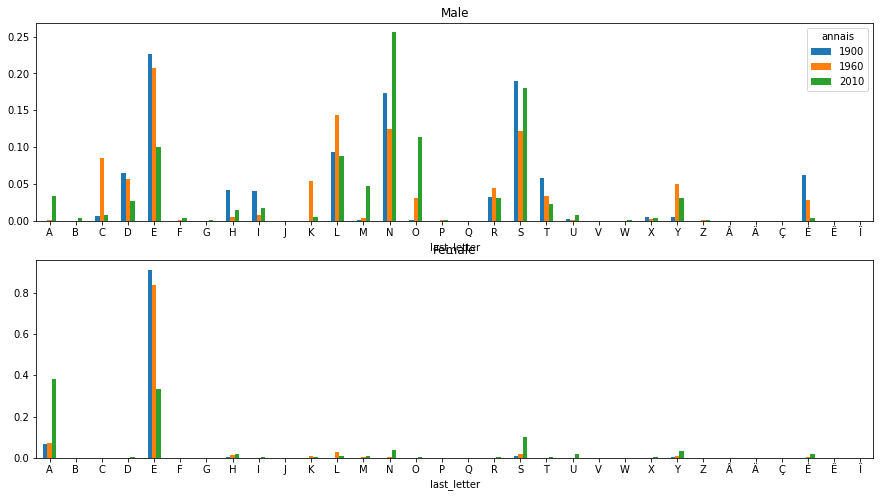

In [178]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
letter_prop[1].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop[2].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)

## 1.4) Regular Expressions

In [179]:
import re
# We already used Regex for matching 3 digits strings :
# map_df[map_df.code_insee.str.contains("\d\d\d")]

string  = "cette chaine ne contient pas de série de 03 chiffres "


matches=re.findall("\d\d\d",string)





# re.match() function matches regular expressions starting at the beginning of a string. 
# It behaves as if every pattern has ^ prepended.

# The functions match and search return None if no match is found and a match object otherwise. 

# You can retrieve captured matches via the group method on the match object. 
# The group method without any argument returns the entire match. 
# The group method with a positive integer argument returns captured expressions: group(1) returns the first capture, 
# group(2) returns the second, analogous to $1, $2, etc. in Perl.
# To find all matches to a pattern, use re.findall() rather than re.search(). 
# The findall method returns a list of matches rather than a match object. 
# If the match contains captured subexpressions, findall will return a list of tuples, the tuples being the captures.
# re.sub pour substituer
# case insensitive :  searchObj = re.search( r'dogs', line, re.M|re.I)


# re.match() cherche le pattern AU DEBUT DE LA LIGNE et renvoie la première occurence trouvée
# re.find() cherche le pattern dans toute la chaine et renvoie la première occurence trouvée
# re.findall() cherche le pattern dans toute la chaine et renvoie toutes les occurences trouvées

# https://www.guru99.com/python-regular-expressions-complete-tutorial.html#4


In [180]:
matches

[]

In [181]:
string2 = "cette chaine contient une série de 003 chiffres "

matches=re.findall("\d\d\d",string2)
matches

['003']

In [182]:
string3 = "cette chaine contient 002 séries de 003 chiffres "

matches=re.findall("\d\d\d",string3)
matches

['002', '003']

In [63]:
# CHERCHER REMPLACER
# re.sub(pattern, repl, string, max=0)
newstring=re.sub("\d\d\d","xxx",string3)
newstring

'cette chaine contient xxx séries de xxx chiffres '

In [183]:
# On peut aussi réutiliser les sous-chaines matchées en utilisant les parenthèses
# r"" est une RAW string. ça permet de ne pas avoir a échapper les caractères spéciaux
newstring=re.sub("\d\d(\d)",r"\1",string3)
newstring



'cette chaine contient 2 séries de 3 chiffres '

In [184]:
# Chaque partie de la regexp entre parenthèses matchée peut être réutilisée avec \1 \2 \3 etc..
# r"" python raw strings. 

newstring=re.sub("(\d)(\d)(\d)",r"\3\2\1",string3)
newstring

'cette chaine contient 200 séries de 300 chiffres '

In [191]:
# COMMENT FAIRE SI JE VEUX MATCHER N'IMPORTE QUEL CARACTERE ?
# . Matches any single character except newline.
# .* matches 0 or more occurences of any single charactere
# .+ matches 1 or more occurences of any single charactere

string4="le début est avant la fin"

#atches=re.findall(".*avant",string4)
#atches=re.findall("avant.*string4)

matches=re.findall(".* ",string4)
matches





['le début est avant la ']

In [ ]:
# * est greedy , il a pris tout ce qu'il pouvait.
# comment faire si je veux le rendre lazy ?
# .*?
# ? va rendre * LAZY


In [192]:
matches=re.findall(".*? ",string4)
matches

['le ', 'début ', 'est ', 'avant ', 'la ']

In [193]:
string4="le début est avant la fin"
newstring=re.sub("(.*)( est )(.*)",r"\3\2\1",string4)
newstring


'avant la fin est le début'

In [194]:
string3 = "cette chaine contient 002 séries de 003 chiffres "

matches=re.findall("\d+",string3)
matches

# match tous les blocs de 1 ou + chiffres

['002', '003']

In [195]:
# Attention, par défaut le caractère * est "greedy", il englobe tout ce qu'il peut
string4="le début est avant la fin"
newstring=re.findall("d.*t",string4)
newstring

['début est avant']

In [76]:
# Je peux rendre * "lazy" avec ?
newstring=re.findall("d.*?t",string4)
newstring


['début']

# 2) WebScraping

## 2.1) Using Requests + Regexps

Requests est une lib Python qui implémente le protocole http, permettant de faire des requêtes web.



In [80]:
!pip install requests

In [197]:
import requests as req         # module de requête http
url="https://www.laboiteverte.fr/"
page = req.request('get', url) # on récupère une page 
html = page.text              # on récupère le contenu html de la page

In [78]:
html

'<!DOCTYPE html>\n<html lang="fr-FR">\n<head>\n<meta charset="UTF-8">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<script src="/cdn-cgi/apps/head/0agGRwNEyRKP1HgMn3__FqQ_YLU.js"></script><link rel="profile" href="https://gmpg.org/xfn/11">\n<link rel="pingback" href="https://www.laboiteverte.fr/xmlrpc.php">\n<meta property="fb:pages" content="323359661529" />\n\n<title>La boite verte : Site de découverte sur la photographie, la science, les arts et tout ce qui est insolite.</title>\n<meta name="description" content="Une boite verte qui me sert à ranger des trucs sur la photographie, le design, la technologie, des vidéos, des artistes et des plein de choses insolites." />\n<meta name="robots" content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" />\n<link rel="canonical" href="https://www.laboiteverte.fr/" />\n<link rel="next" href="https://www.laboiteverte.fr/page/2/" />\n<meta property="og:locale" content="fr_FR" />\n<meta pro

In [79]:
type(html)

str

In [198]:
# c'est bien du texte, on peut appliquer les regexps.
# un lien html : 
# <a href="http://www.google.fr"> moteur de recherche </a>
# Récupérons tous les liens :

liens= re.findall("<a.*/a>",html)
liens



['<a class="skip-link screen-reader-text" href="#content">Aller au contenu</a>',
 '<a class="header-entry-logo" href="https://www.laboiteverte.fr/" rel="home"></a>',
 '<a href="https://www.laboiteverte.fr/" rel="home">La boite verte</a>',
 '<a href="https://www.laboiteverte.fr/category/art/">Arts</a>',
 '<a href="https://www.laboiteverte.fr/category/art/photographie/">Photographie</a>',
 '<a href="https://www.laboiteverte.fr/category/divers/">Divers</a>',
 '<a href="https://www.laboiteverte.fr/category/savoir/">Savoir</a>',
 '<a href="https://www.laboiteverte.fr/category/tech-sci/">Techno / Science</a>',
 '<a href="#">Recherche</a>',
 '<a class="page-numbers" href="https://www.laboiteverte.fr/page/2/">2</a>',
 '<a class="page-numbers" href="https://www.laboiteverte.fr/page/3/">3</a>',
 '<a class="page-numbers" href="https://www.laboiteverte.fr/page/285/">285</a>',
 '<a class="next page-numbers" href="https://www.laboiteverte.fr/page/2/">></a>',
 '<a href="/category/featured/"><div clas

In [199]:
len(liens)

25

In [83]:
# trouver les liens internes
[x for x in liens if re.findall(r"laboiteverte.fr",x)]   +   [x for x in liens if re.findall('href="/',x)]

# + joins lists


['<a class="header-entry-logo" href="https://www.laboiteverte.fr/" rel="home"></a>',
 '<a href="https://www.laboiteverte.fr/" rel="home">La boite verte</a>',
 '<a href="https://www.laboiteverte.fr/category/art/">Arts</a>',
 '<a href="https://www.laboiteverte.fr/category/art/photographie/">Photographie</a>',
 '<a href="https://www.laboiteverte.fr/category/divers/">Divers</a>',
 '<a href="https://www.laboiteverte.fr/category/savoir/">Savoir</a>',
 '<a href="https://www.laboiteverte.fr/category/tech-sci/">Techno / Science</a>',
 '<a class="page-numbers" href="https://www.laboiteverte.fr/page/2/">2</a>',
 '<a class="page-numbers" href="https://www.laboiteverte.fr/page/3/">3</a>',
 '<a class="page-numbers" href="https://www.laboiteverte.fr/page/285/">285</a>',
 '<a class="next page-numbers" href="https://www.laboiteverte.fr/page/2/">></a>',
 '<a href="/category/featured/"><div class="footer-link"><i class="icon-star-outline"></i><div class="footer-link-txt">Best-Of</div></div></a>',
 '<a hr

In [85]:
# trouver les liens exterieurs
liens= re.findall("<a.*/a>",html)

liste1=[ _ for _ in liens if not re.findall(r"laboiteverte.fr",_)]

liste2=[ _ for _ in liste1 if not re.findall(r'href="/',_) ]

liste3 =[ _ for _ in liste2 if not re.findall(r'href="#',_) ]

liste3


['<a rel="nofollow" target="_blank" href="https://plus.google.com/+laboiteverte/"><i class="icon-googleplus gg"></i></a>',
 '<a rel="nofollow" target="_blank" href="https://twitter.com/LaBoiteVerte"><i class="icon-twitter tw"></i></a>',
 '<a rel="nofollow" target="_blank" href="https://www.facebook.com/LaBoiteVerte"><i class="icon-facebook fb"></i></a>',
 '<a rel="nofollow" target="_blank" href="http://laboiteverte.tumblr.com/"><i class="icon-tumblr tu"></i></a>']

## 2.2) Using Requests + Beautiful soup and the CSS Selectors


In [ ]:
# !pip install bs4

In [202]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html)

In [88]:
# https://www.w3schools.com/cssref/css_selectors.asp

## 2.2.1) Match using Html element name

In [203]:
selector = "a"
bsliens    = soup.find_all(selector)
len(bsliens)

74

In [204]:
bsliens

[<a class="skip-link screen-reader-text" href="#content">Aller au contenu</a>,
 <a class="header-entry-logo" href="https://www.laboiteverte.fr/" rel="home"></a>,
 <a href="https://www.laboiteverte.fr/" rel="home">La boite verte</a>,
 <a href="https://www.laboiteverte.fr/category/art/">Arts</a>,
 <a href="https://www.laboiteverte.fr/category/art/photographie/">Photographie</a>,
 <a href="https://www.laboiteverte.fr/category/divers/">Divers</a>,
 <a href="https://www.laboiteverte.fr/category/savoir/">Savoir</a>,
 <a href="https://www.laboiteverte.fr/category/tech-sci/">Techno / Science</a>,
 <a href="#">Recherche</a>,
 <a class="post-a-box" href="https://www.laboiteverte.fr/leigengrau/">
 <div class="entry-content">
 <img alt="" class="attachment-tb-wl size-tb-wl wp-post-image" data-attachment-id="25479" data-comments-opened="1" data-image-description="" data-image-meta='{"aperture":"0","credit":"","camera":"","caption":"","created_timestamp":"0","copyright":"","focal_length":"0","iso":"

In [ ]:
# La syntaxe du selector est celle des CSS selector utilisés dans les feuilles de style.
# Cette syntaxe permet de sélectionner des éléments du DOM
# ( DOM = arborescence contenant tous les objets d'une page web)

In [205]:
len(liens), len (bsliens)

(25, 74)

In [ ]:
# Quelqu'un peut m'expliquer d'ou vient la différence ??



In [92]:
liens= re.findall("<a.*?/a>",html,re.DOTALL)

len(liens), len(bsliens)


(74, 74)

In [206]:
selector = "img"
imgs    = soup.find_all(selector)
len(imgs)

48

In [94]:
imgs

[<img alt="" class="attachment-tb-wl size-tb-wl wp-post-image" data-attachment-id="25479" data-comments-opened="1" data-image-description="" data-image-meta='{"aperture":"0","credit":"","camera":"","caption":"","created_timestamp":"0","copyright":"","focal_length":"0","iso":"0","shutter_speed":"0","title":"","orientation":"0"}' data-image-title="" data-large-file="https://www.laboiteverte.fr/wp-content/uploads/2013/07/eigengrau-720x5851.png" data-medium-file="https://www.laboiteverte.fr/wp-content/uploads/2013/07/eigengrau-720x5851-591x480.png" data-orig-file="https://www.laboiteverte.fr/wp-content/uploads/2013/07/eigengrau-720x5851.png" data-orig-size="720,585" data-permalink="https://www.laboiteverte.fr/leigengrau/attachment/25479/" height="513" loading="lazy" sizes="(max-width: 631px) 100vw, 631px" src="https://www.laboiteverte.fr/wp-content/uploads/2013/07/eigengrau-720x5851.png" srcset="https://www.laboiteverte.fr/wp-content/uploads/2013/07/eigengrau-720x5851.png 720w, https://www

In [95]:
type(imgs)

bs4.element.ResultSet

In [207]:
type(imgs[0])

bs4.element.Tag

In [209]:
imgs[10]['src']

'https://www.laboiteverte.fr/wp-content/uploads/2020/08/sign-of-times-01-480x320.png'

In [211]:
img_src= [img['src'] for img in imgs]
img_src

['https://www.laboiteverte.fr/wp-content/uploads/2013/07/eigengrau-720x5851.png',
 'https://www.laboiteverte.fr/wp-content/uploads/2015/09/arbre-timide-feuillage-01-464x261.jpg',
 'https://www.laboiteverte.fr/wp-content/uploads/2014/12/Tao-Liu-photographie-rue-chine-01-464x261.jpg',
 'https://www.laboiteverte.fr/wp-content/uploads/2020/09/Screenshot_6-480x320.png',
 'https://www.laboiteverte.fr/wp-content/uploads/2020/09/mineralogie-exploration-01-480x320.jpg',
 'https://www.laboiteverte.fr/wp-content/uploads/2020/09/Screenshot_5-480x320.png',
 'https://www.laboiteverte.fr/wp-content/uploads/2020/08/escalier-arc-01-480x320.jpg',
 'https://www.laboiteverte.fr/wp-content/uploads/2020/08/maisons-oubli-01-480x320.jpg',
 'https://www.laboiteverte.fr/wp-content/uploads/2020/08/ghibli-decoupe-02-480x320.jpg',
 'https://www.laboiteverte.fr/wp-content/uploads/2020/08/anses-01-480x320.jpg',
 'https://www.laboiteverte.fr/wp-content/uploads/2020/08/sign-of-times-01-480x320.png',
 'https://www.labo

## 2.2.1) Match using class name

In [212]:
selector = "entry-title"
nodes    = soup.find_all(class_=selector) # class is a python reserved keyword, that's why the name of the param is class_
len(nodes)

47

In [213]:
nodes

[<span class="entry-title">L’eigengrau : la couleur de l’absence de lumière</span>,
 <span class="entry-title">La timidité des arbres</span>,
 <span class="entry-title">La rue chinoise de Tao Liu</span>,
 <span class="entry-title">Patience et splendeurs chez une papetière</span>,
 <span class="entry-title">2242 illustrations minéralogiques à explorer en HD (et le making of)</span>,
 <span class="entry-title">Un orgue électronique très « chouette »</span>,
 <span class="entry-title">Elles ont tué le game de l’escalier arc en ciel</span>,
 <span class="entry-title">387 petites maisons presque oubliées</span>,
 <span class="entry-title">Ghibli en papier délicatement peint et découpé</span>,
 <span class="entry-title">La guerre de cent anses</span>,
 <span class="entry-title">« Signe des temps, temps du signe » par Hanne Darboven et Ruth Wolf-Rehfeldt</span>,
 <span class="entry-title">La faune et la flore rhabillées par Bill Meyer</span>,
 <span class="entry-title">The Masked Series par I

## 2.3) Browsing the Dom tree nodes

In [225]:
selector = "site"
nodes    = soup.find_all(class_=selector) # class is a python reserved keyword, that's why the name of the param is class_
len(nodes)

1

In [226]:
type(nodes)

bs4.element.ResultSet

In [227]:
type(nodes[0])

bs4.element.Tag

In [228]:
nodes[0].text

'\nAller au contenu\n\n\n\n\nLa boite verte\n\n\n\nArts\nPhotographie\nDivers\nSavoir\nTechno / Science\nRecherche\n \n\n\n\nRechercher\xa0:\n\n\n\n\n\n\n\n\n\nÀ la une \n\n\n\n\n \n\nL’eigengrau : la couleur de l’absence de lumière \n\n\n\n\n\n\n\n \n\nLa timidité des arbres \n\n\n\n\n\n \n\nLa rue chinoise de Tao Liu \n\n\n\n\n\n\n\n\n\n\n\n\nPatience et splendeurs chez une papetière \n\n11.09.\n\nDivers \n\n\n \n\n\n\n\n\n2242 illustrations minéralogiques à explorer en HD (et le making of) \n\n09.09.\n\nArts graphiques \n\n\n \n\n\n\n\n\nUn orgue électronique très «\xa0chouette\xa0» \n\n08.09.\n\nDivers \n\n\n \n\n\n\n\n\nElles ont tué le game de l’escalier arc en ciel \n\n28.08.\n\nArts graphiques \n\n\n \n\n\n\n\n\n387 petites maisons presque oubliées \n\n20.08.\n\nDivers \n\n\n \n\n\n\n\n\nGhibli en papier délicatement peint et découpé \n\n18.08.\n\nArts graphiques \n\n\n \n\n\n\n\n\nLa guerre de cent anses \n\n17.08.\n\nChoses \n\n\n \n\n\n\n\n\n«\xa0Signe des temps, temps du si

In [229]:
nodes[0]

<div class="site" id="page">
<a class="skip-link screen-reader-text" href="#content">Aller au contenu</a>
<header class="site-header" id="masthead" role="banner">
<div class="site-branding">
<div class="header-menu-ico"></div>
<a class="header-entry-logo" href="https://www.laboiteverte.fr/" rel="home"></a>
<h1 class="site-title"><a href="https://www.laboiteverte.fr/" rel="home">La boite verte</a></h1>
<div class="header-search-ico"></div>
</div>
<nav class="main-navigation" id="site-navigation" role="navigation">
<ul class="menu" id="primary-menu"><li class="color-art menu-item menu-item-type-taxonomy menu-item-object-category menu-item-65802" id="menu-item-65802"><span><a href="https://www.laboiteverte.fr/category/art/">Arts</a></span></li>
<li class="color-photo menu-item menu-item-type-taxonomy menu-item-object-category menu-item-65803" id="menu-item-65803"><span><a href="https://www.laboiteverte.fr/category/art/photographie/">Photographie</a></span></li>
<li class="color-divers men

In [217]:
nodes[0].parent

<header class="entry-header">
<span class="entry-title">L’eigengrau : la couleur de l’absence de lumière</span> </header>

In [ ]:
# le nodes[0] est un div, contenu dans un <a> </a>

In [231]:
for child in nodes[0].children:
    try:
        print("-"*20)
        print(child)
    except Exception as e:
        pass

--------------------


--------------------
<a class="skip-link screen-reader-text" href="#content">Aller au contenu</a>
--------------------


--------------------
<header class="site-header" id="masthead" role="banner">
<div class="site-branding">
<div class="header-menu-ico"></div>
<a class="header-entry-logo" href="https://www.laboiteverte.fr/" rel="home"></a>
<h1 class="site-title"><a href="https://www.laboiteverte.fr/" rel="home">La boite verte</a></h1>
<div class="header-search-ico"></div>
</div>
<nav class="main-navigation" id="site-navigation" role="navigation">
<ul class="menu" id="primary-menu"><li class="color-art menu-item menu-item-type-taxonomy menu-item-object-category menu-item-65802" id="menu-item-65802"><span><a href="https://www.laboiteverte.fr/category/art/">Arts</a></span></li>
<li class="color-photo menu-item menu-item-type-taxonomy menu-item-object-category menu-item-65803" id="menu-item-65803"><span><a href="https://www.laboiteverte.fr/category/art/photographie

In [ ]:
<html>
    <head>
    
    </head>
    <body>
    
    </body>
</html>

In [232]:
head=soup.head
head


<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<script src="/cdn-cgi/apps/head/0agGRwNEyRKP1HgMn3__FqQ_YLU.js"></script><link href="https://gmpg.org/xfn/11" rel="profile"/>
<link href="https://www.laboiteverte.fr/xmlrpc.php" rel="pingback"/>
<meta content="323359661529" property="fb:pages">
<title>La boite verte : Site de découverte sur la photographie, la science, les arts et tout ce qui est insolite.</title>
<meta content="Une boite verte qui me sert à ranger des trucs sur la photographie, le design, la technologie, des vidéos, des artistes et des plein de choses insolites." name="description">
<meta content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="robots"/>
<link href="https://www.laboiteverte.fr/" rel="canonical">
<link href="https://www.laboiteverte.fr/page/2/" rel="next">
<meta content="fr_FR" property="og:locale"/>
<meta content="website" property="og:type"/>
<meta content="La boite

In [233]:
body=soup.body
for child in body.children:
    try:
        print(child)
        print("-" * 20)
    except Exception as e:
        pass




--------------------
<div class="site" id="page">
<a class="skip-link screen-reader-text" href="#content">Aller au contenu</a>
<header class="site-header" id="masthead" role="banner">
<div class="site-branding">
<div class="header-menu-ico"></div>
<a class="header-entry-logo" href="https://www.laboiteverte.fr/" rel="home"></a>
<h1 class="site-title"><a href="https://www.laboiteverte.fr/" rel="home">La boite verte</a></h1>
<div class="header-search-ico"></div>
</div>
<nav class="main-navigation" id="site-navigation" role="navigation">
<ul class="menu" id="primary-menu"><li class="color-art menu-item menu-item-type-taxonomy menu-item-object-category menu-item-65802" id="menu-item-65802"><span><a href="https://www.laboiteverte.fr/category/art/">Arts</a></span></li>
<li class="color-photo menu-item menu-item-type-taxonomy menu-item-object-category menu-item-65803" id="menu-item-65803"><span><a href="https://www.laboiteverte.fr/category/art/photographie/">Photographie</a></span></li>
<li 

## 2.4) Real world use case : analyse météo

In [237]:
url   = "https://www.infoclimat.fr/observations-meteo/archives/7/septembre/2019/paris-montsouris/07156.html"
page  = req.request("get", url )
html  = page.text
soup  = BeautifulSoup(html)

In [238]:
html

'<!DOCTYPE html>\n<html>\n\n<head>\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, user-scalable=yes, minimum-scale=0.25"/>\n    <link rel="stylesheet" href="/styles_src/materialize.css?v2.css">\n    <link href="https://fonts.googleapis.com/icon?family=Material+Icons" rel="stylesheet">\n\n    <!--BENCH_start = (1.1920928955078E-6, 1.1920928955078E-6) -->\n<meta name="description" content="Infoclimat, la m&eacute;t&eacute;o en France en temps r&eacute;el - Weather in realtime Europe, Canada" /><meta name="keywords" content="infoclimat, meteo en direct, france, europe, live, observation meteo, climatologie, gfs, ukmo, wrf, meteo, temps, reel, climat, information, modeles, previsions, association, weather, realtime, europe, temperatures, wind, wetter, weather" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" /><meta name="apple-itunes-app" content="app-id=901314430" /><meta http-equiv="X-UA-Compatible" content="chrome=1, IE=edge"><title>Paris

In [142]:
import webbrowser
import os
os.getcwd()


with open("meteo.html", "a", encoding="utf8") as f:
    f.writelines(html)

webbrowser.open(os.getcwd()+"meteo.html")


False

In [239]:
soup

<!DOCTYPE html>

<html>
<head>
<meta content="width=device-width, initial-scale=1.0, user-scalable=yes, minimum-scale=0.25" name="viewport"/>
<link href="/styles_src/materialize.css?v2.css" rel="stylesheet"/>
<link href="https://fonts.googleapis.com/icon?family=Material+Icons" rel="stylesheet"/>
<!--BENCH_start = (1.1920928955078E-6, 1.1920928955078E-6) -->
<meta content="Infoclimat, la météo en France en temps réel - Weather in realtime Europe, Canada" name="description"/><meta content="infoclimat, meteo en direct, france, europe, live, observation meteo, climatologie, gfs, ukmo, wrf, meteo, temps, reel, climat, information, modeles, previsions, association, weather, realtime, europe, temperatures, wind, wetter, weather" name="keywords"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="app-id=901314430" name="apple-itunes-app"/><meta content="chrome=1, IE=edge" http-equiv="X-UA-Compatible"/><title>Paris-Montsouris (Paris - France) | Archives des relev

Comment trouver le nom de l'élément qui contient la data que je veux scraper ?

In [240]:
# pour matcher toutes les lignes du tableau  ( <tr></tr>): 
selector = '#resptable-releves > tbody > tr'
table_row    = soup.select(selector)
table_row

[<tr>
 <!-- heure -->
 <th style="font-size:1.25em">
 <span class="tipsy-trigger" title="Heure réelle d'émission :&lt;br /&gt;07/09/2019&lt;br /&gt;&lt;b&gt;23h00 UTC&lt;/b&gt;">01h</span> </th>
 <!-- plus -->
 <td style="padding:2px 4px">
 <a href="/stations-meteo/image_mf.php?id=07156&amp;dh=2019-09-07 23:00:00&amp;token=17506dd1987495acdf7049db628c3f14" target="_blank"><i class="material-icons">add_circle_outline</i></a>
 </td>
 <td style="/*background-color:rgba(0,0,0,0.1)*/"><span class="tipsy-trigger" style="font-weight:bold;display:inline-block;font-size:16px" title="&lt;div&gt;Minimale sur 1h : 13.9°C à 22:53 UTC&lt;/div&gt;&lt;div&gt;Maximale sur 1h : 14.3°C à 22:01 UTC&lt;/div&gt;">13.9</span> <span class="tab-units-v">°C</span><span class="color-heatmap" style="background-color:rgb(245,255,25)"></span> <div style="font-size:9px; margin-bottom: -8px">
 <span style="color:#081dbb">13.9</span> → <span style="color:#841910">14.3</span>
 </div></td><td>0 <span class="tab-units-v"

In [241]:
len(table_row)

24

In [146]:
# il faut bien comprendre la structure d'une table html:
# <table><tr><td></td><td></td><td></td></tr><tr> ....  </table>
table standard html :
    
    <table>
        <tr>
            <th> titre </th>
            <td> texte </td>
            <td> texte </td>
        </tr>
        <tr>
            <th> titre </th>
            <td> texte </td>
            <td> texte </td>
        </tr>
    </table>



SyntaxError: invalid syntax (<ipython-input-146-609b98515c84>, line 3)

In [147]:
# Pour matcher une cellule située à une ligne et colonne spécifique du tableau :

selector="#resptable-releves > tbody > tr:nth-child(1) > td:nth-child(3) > span.tipsy-trigger"
soup.select(selector)[0].text

'13.9'

In [242]:
# Toutes les cellules du tableau :

for ligne in range(len(table_row)+1):
    print("=" * 10)
    print( f"ligne :{ligne}" )
    for col in range(1,10): # il y a 10 colonnes a scraper
        print("-" * 10 )
        try:
            print(f"ligne : {ligne} colonne : {col}" )
            selector=f"#resptable-releves > tbody > tr:nth-child({ligne}) > :nth-child({col}) "
            print(selector)
            print(soup.select(selector)[0].text)
        except Exception as e:
            print(e)

ligne :0
----------
ligne : 0 colonne : 1
#resptable-releves > tbody > tr:nth-child(0) > :nth-child(1) 
list index out of range
----------
ligne : 0 colonne : 2
#resptable-releves > tbody > tr:nth-child(0) > :nth-child(2) 
list index out of range
----------
ligne : 0 colonne : 3
#resptable-releves > tbody > tr:nth-child(0) > :nth-child(3) 
list index out of range
----------
ligne : 0 colonne : 4
#resptable-releves > tbody > tr:nth-child(0) > :nth-child(4) 
list index out of range
----------
ligne : 0 colonne : 5
#resptable-releves > tbody > tr:nth-child(0) > :nth-child(5) 
list index out of range
----------
ligne : 0 colonne : 6
#resptable-releves > tbody > tr:nth-child(0) > :nth-child(6) 
list index out of range
----------
ligne : 0 colonne : 7
#resptable-releves > tbody > tr:nth-child(0) > :nth-child(7) 
list index out of range
----------
ligne : 0 colonne : 8
#resptable-releves > tbody > tr:nth-child(0) > :nth-child(8) 
list index out of range
----------
ligne : 0 colonne : 9
#respt

0 mm/1h
----------
ligne : 8 colonne : 5
#resptable-releves > tbody > tr:nth-child(8) > :nth-child(5) 
18 km/hraf.35.6 

----------
ligne : 8 colonne : 6
#resptable-releves > tbody > tr:nth-child(8) > :nth-child(6) 
51%
----------
ligne : 8 colonne : 7
#resptable-releves > tbody > tr:nth-child(8) > :nth-child(7) 
192 
----------
ligne : 8 colonne : 8
#resptable-releves > tbody > tr:nth-child(8) > :nth-child(8) 
7.5 °C
----------
ligne : 8 colonne : 9
#resptable-releves > tbody > tr:nth-child(8) > :nth-child(9) 
1021.0hPa
ligne :9
----------
ligne : 9 colonne : 1
#resptable-releves > tbody > tr:nth-child(9) > :nth-child(1) 

17h 
----------
ligne : 9 colonne : 2
#resptable-releves > tbody > tr:nth-child(9) > :nth-child(2) 

add_circle_outline

----------
ligne : 9 colonne : 3
#resptable-releves > tbody > tr:nth-child(9) > :nth-child(3) 
18.3 °C 
18.1 → 18.7

----------
ligne : 9 colonne : 4
#resptable-releves > tbody > tr:nth-child(9) > :nth-child(4) 
0 mm/1h
----------
ligne : 9 colonn

12.3 °C
----------
ligne : 16 colonne : 9
#resptable-releves > tbody > tr:nth-child(16) > :nth-child(9) 
1021.1hPa
ligne :17
----------
ligne : 17 colonne : 1
#resptable-releves > tbody > tr:nth-child(17) > :nth-child(1) 

09h 
----------
ligne : 17 colonne : 2
#resptable-releves > tbody > tr:nth-child(17) > :nth-child(2) 

add_circle_outline

----------
ligne : 17 colonne : 3
#resptable-releves > tbody > tr:nth-child(17) > :nth-child(3) 
14.9 °C 
14.3 → 14.9

----------
ligne : 17 colonne : 4
#resptable-releves > tbody > tr:nth-child(17) > :nth-child(4) 
0 mm/1h
----------
ligne : 17 colonne : 5
#resptable-releves > tbody > tr:nth-child(17) > :nth-child(5) 
7 km/hraf.24.5 

----------
ligne : 17 colonne : 6
#resptable-releves > tbody > tr:nth-child(17) > :nth-child(6) 
84%
----------
ligne : 17 colonne : 7
#resptable-releves > tbody > tr:nth-child(17) > :nth-child(7) 

----------
ligne : 17 colonne : 8
#resptable-releves > tbody > tr:nth-child(17) > :nth-child(8) 
12.2 °C
----------
l

In [247]:
# Toutes les cellules du tableau :

for ligne in range(len(table_row)+1):
    print("=" * 10)
    for col in range(1,10): # il y a 10 colonnes a scraper
        print("-" * 10 )
        try:
            print(f"ligne : {ligne} colonne : {col}" )
            selector=f"#resptable-releves > tbody > tr:nth-child({ligne}) > :nth-child({col}) "
            print(soup.select(selector)[0].text)
        except Exception as e:
            print(e)

----------
ligne : 0 colonne : 1
list index out of range
----------
ligne : 0 colonne : 2
list index out of range
----------
ligne : 0 colonne : 3
list index out of range
----------
ligne : 0 colonne : 4
list index out of range
----------
ligne : 0 colonne : 5
list index out of range
----------
ligne : 0 colonne : 6
list index out of range
----------
ligne : 0 colonne : 7
list index out of range
----------
ligne : 0 colonne : 8
list index out of range
----------
ligne : 0 colonne : 9
list index out of range
----------
ligne : 1 colonne : 1

01h 
----------
ligne : 1 colonne : 2

add_circle_outline

----------
ligne : 1 colonne : 3
13.9 °C 
13.9 → 14.3

----------
ligne : 1 colonne : 4
0 mm/1h
----------
ligne : 1 colonne : 5
14 km/hraf.32.4 

----------
ligne : 1 colonne : 6
76%
----------
ligne : 1 colonne : 7

----------
ligne : 1 colonne : 8
9.7 °C
----------
ligne : 1 colonne : 9
1023hPa
----------
ligne : 2 colonne : 1

00h 
----------
ligne : 2 colonne : 2

add_circle_outline

--


----------
ligne : 19 colonne : 8
11.9 °C
----------
ligne : 19 colonne : 9
1020.3hPa
----------
ligne : 20 colonne : 1

06h 
----------
ligne : 20 colonne : 2

add_circle_outline

----------
ligne : 20 colonne : 3
14.8 °C 
14.7 → 14.8

----------
ligne : 20 colonne : 4
0 mm/1h
----------
ligne : 20 colonne : 5
7 km/hraf.26.3 

----------
ligne : 20 colonne : 6
83%
----------
ligne : 20 colonne : 7

----------
ligne : 20 colonne : 8
11.9 °C
----------
ligne : 20 colonne : 9
1020.4hPa
----------
ligne : 21 colonne : 1

05h 
----------
ligne : 21 colonne : 2

add_circle_outline

----------
ligne : 21 colonne : 3
14.7 °C 
14.6 → 14.7

----------
ligne : 21 colonne : 4
0 mm/1h
----------
ligne : 21 colonne : 5
11 km/hraf.21.2 

----------
ligne : 21 colonne : 6
82%
----------
ligne : 21 colonne : 7

----------
ligne : 21 colonne : 8
11.7 °C
----------
ligne : 21 colonne : 9
1020.7hPa
----------
ligne : 22 colonne : 1

04h 
----------
ligne : 22 colonne : 2

add_circle_outline

----------


In [249]:
# on affine en ajoutant le span

for ligne in range(len(table_row)+1):
    print("=" * 10)
    print( f"ligne :{ligne}" )
    for col in range(1,10): # il y a 10 colonnes a scraper
        print("-" * 10 )
        try:
            print(f"ligne : {ligne} colonne : {col}" )
            selector=f"#resptable-releves > tbody > tr:nth-child({ligne}) > :nth-child({col}) > span"
            print(selector)
            print(soup.select(selector)[0].text)
        except Exception as e:
            print(e)

ligne :0
----------
ligne : 0 colonne : 1
#resptable-releves > tbody > tr:nth-child(0) > :nth-child(1) > span
list index out of range
----------
ligne : 0 colonne : 2
#resptable-releves > tbody > tr:nth-child(0) > :nth-child(2) > span
list index out of range
----------
ligne : 0 colonne : 3
#resptable-releves > tbody > tr:nth-child(0) > :nth-child(3) > span
list index out of range
----------
ligne : 0 colonne : 4
#resptable-releves > tbody > tr:nth-child(0) > :nth-child(4) > span
list index out of range
----------
ligne : 0 colonne : 5
#resptable-releves > tbody > tr:nth-child(0) > :nth-child(5) > span
list index out of range
----------
ligne : 0 colonne : 6
#resptable-releves > tbody > tr:nth-child(0) > :nth-child(6) > span
list index out of range
----------
ligne : 0 colonne : 7
#resptable-releves > tbody > tr:nth-child(0) > :nth-child(7) > span
list index out of range
----------
ligne : 0 colonne : 8
#resptable-releves > tbody > tr:nth-child(0) > :nth-child(8) > span
list index out 

18h
----------
ligne : 8 colonne : 2
#resptable-releves > tbody > tr:nth-child(8) > :nth-child(2) > span
list index out of range
----------
ligne : 8 colonne : 3
#resptable-releves > tbody > tr:nth-child(8) > :nth-child(3) > span
17.8
----------
ligne : 8 colonne : 4
#resptable-releves > tbody > tr:nth-child(8) > :nth-child(4) > span
mm/1h
----------
ligne : 8 colonne : 5
#resptable-releves > tbody > tr:nth-child(8) > :nth-child(5) > span
18
----------
ligne : 8 colonne : 6
#resptable-releves > tbody > tr:nth-child(8) > :nth-child(6) > span
51
----------
ligne : 8 colonne : 7
#resptable-releves > tbody > tr:nth-child(8) > :nth-child(7) > span
list index out of range
----------
ligne : 8 colonne : 8
#resptable-releves > tbody > tr:nth-child(8) > :nth-child(8) > span
7.5
----------
ligne : 8 colonne : 9
#resptable-releves > tbody > tr:nth-child(8) > :nth-child(9) > span
hPa
ligne :9
----------
ligne : 9 colonne : 1
#resptable-releves > tbody > tr:nth-child(9) > :nth-child(1) > span
17h
-

mm/1h
----------
ligne : 16 colonne : 5
#resptable-releves > tbody > tr:nth-child(16) > :nth-child(5) > span
7
----------
ligne : 16 colonne : 6
#resptable-releves > tbody > tr:nth-child(16) > :nth-child(6) > span
81
----------
ligne : 16 colonne : 7
#resptable-releves > tbody > tr:nth-child(16) > :nth-child(7) > span
list index out of range
----------
ligne : 16 colonne : 8
#resptable-releves > tbody > tr:nth-child(16) > :nth-child(8) > span
12.3
----------
ligne : 16 colonne : 9
#resptable-releves > tbody > tr:nth-child(16) > :nth-child(9) > span
hPa
ligne :17
----------
ligne : 17 colonne : 1
#resptable-releves > tbody > tr:nth-child(17) > :nth-child(1) > span
09h
----------
ligne : 17 colonne : 2
#resptable-releves > tbody > tr:nth-child(17) > :nth-child(2) > span
list index out of range
----------
ligne : 17 colonne : 3
#resptable-releves > tbody > tr:nth-child(17) > :nth-child(3) > span
14.9
----------
ligne : 17 colonne : 4
#resptable-releves > tbody > tr:nth-child(17) > :nth-ch

69
----------
ligne : 24 colonne : 7
#resptable-releves > tbody > tr:nth-child(24) > :nth-child(7) > span
list index out of range
----------
ligne : 24 colonne : 8
#resptable-releves > tbody > tr:nth-child(24) > :nth-child(8) > span
10.1
----------
ligne : 24 colonne : 9
#resptable-releves > tbody > tr:nth-child(24) > :nth-child(9) > span
hPa


In [251]:
# on retire l'affichage et on met le tout dans un DF
import pandas as pd
df=pd.DataFrame()

for ligne in range(1,len(table_row)+1):
    values=[]
    for col in range(1,11): # il y a 10 colonnes a scraper
        selector=f"#resptable-releves > tbody > tr:nth-child({ligne}) > :nth-child({col}) > span"
        try:
                values.append(soup.select(selector)[0].text)
        except Exception as e:
            values.append("")
    df[ligne]=values

df


,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
0,01h,00h,23h,22h,21h,20h,19h,18h,17h,16h,...,11h,10h,09h,08h,07h,06h,05h,04h,03h,02h
1,,,,,,,,,,,...,,,,,,,,,,
2,13.9,14.3,14.9,14.8,15.4,16.8,17.7,17.8,18.3,18.3,...,16.0,15.6,14.9,14.3,14.4,14.8,14.7,14.6,15.0,15.8
3,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h,...,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h,mm/1h
4,14,18,14,18,14,22,18,18,14,18,...,11,7,7,7,7,7,11,11,11,14
5,76,73,69,67,62,59,51,51,49,52,...,76,81,84,86,85,83,82,80,77,69
6,,,,,,,,,,,...,,,,,,,,,,
7,9.7,9.5,9.3,8.7,8.2,8.7,7.4,7.5,7.4,8.3,...,11.8,12.3,12.2,12,11.9,11.9,11.7,11.2,11,10.1
8,hPa,hPa,hPa,hPa,hPa,hPa,hPa,hPa,hPa,hPa,...,hPa,hPa,hPa,hPa,hPa,hPa,hPa,hPa,hPa,hPa
9,km,km,km,km,km,km,km,km,km,km,...,km,km,km,km,km,km,km,km,km,km


In [252]:
# nous avons créé le DF colonne par colonne, mais il est plus simple d'inverser lignes et colonnes
df=df.T
df

,0,1,2,3,4,5,6,7,8,9
1,01h,,13.9,mm/1h,14,76,,9.7,hPa,km
2,00h,,14.3,mm/1h,18,73,,9.5,hPa,km
3,23h,,14.9,mm/1h,14,69,,9.3,hPa,km
4,22h,,14.8,mm/1h,18,67,,8.7,hPa,km
5,21h,,15.4,mm/1h,14,62,,8.2,hPa,km
6,20h,,16.8,mm/1h,22,59,,8.7,hPa,km
7,19h,,17.7,mm/1h,18,51,,7.4,hPa,km
8,18h,,17.8,mm/1h,18,51,,7.5,hPa,km
9,17h,,18.3,mm/1h,14,49,,7.4,hPa,km
10,16h,,18.3,mm/1h,18,52,,8.3,hPa,km


In [253]:
# On récupère les en-têtes de colonne
headers = soup.select("#resptable-releves > thead > tr > th")
headers

[<th style="">
                 Heure locale
                             </th>,
 <th><!--plus--></th>,
 <th><a class="tipsy-trigger white-text" href="javascript:void(0)" title="Température sous abri normalisé,&lt;br /&gt;relevée entre 1m50 et 2m du sol">Tempé<span class="hide-on-small-only">rature</span></a></th>,
 <th><a class="tipsy-trigger white-text" href="javascript:void(0)" title="Précipitations tombées en 1h">Pluie</a></th>,
 <th><a class="tipsy-trigger white-text" href="javascript:void(0)" title="Vent moyen et en rafales, observé à 10m">Vent</a></th>,
 <th><a class="tipsy-trigger white-text" href="javascript:void(0)" title="Humidité relative">Humidité</a></th>,
 <th><a class="tipsy-trigger white-text" href="javascript:void(0)" title="&lt;b&gt;Température ressentie&lt;/b&gt;&lt;br /&gt;Elle correspond au windchill (indice de refroidissement éolien) lorsque la température est inférieure à 10°C, et à l'humidex (indice de chaleur) lorsque la température est supérieure à 20°C. &lt;

In [254]:
nom_des_colonnes = [header.get_text().strip() for header in headers]
nom_des_colonnes 

['Heure locale',
 '',
 'Température',
 'Pluie',
 'Vent',
 'Humidité',
 'Bio-météo',
 'Pt.\xa0de rosée',
 'Pression',
 'Visibilité']

In [255]:
# je renomme certaine colonnes pour y accéder plus facilement

nom_des_colonnes=['Heure',
 '',
 'Temp',
 'Pluie',
 'Vent',
 'Humidité',
 'Biometeo',
 'Ptderosée',
 'Pression',
 'Visibilité']


In [256]:
df.columns = nom_des_colonnes 
df

,Heure,,Temp,Pluie,Vent,Humidité,Biometeo,Ptderosée,Pression,Visibilité
1,01h,,13.9,mm/1h,14,76,,9.7,hPa,km
2,00h,,14.3,mm/1h,18,73,,9.5,hPa,km
3,23h,,14.9,mm/1h,14,69,,9.3,hPa,km
4,22h,,14.8,mm/1h,18,67,,8.7,hPa,km
5,21h,,15.4,mm/1h,14,62,,8.2,hPa,km
6,20h,,16.8,mm/1h,22,59,,8.7,hPa,km
7,19h,,17.7,mm/1h,18,51,,7.4,hPa,km
8,18h,,17.8,mm/1h,18,51,,7.5,hPa,km
9,17h,,18.3,mm/1h,14,49,,7.4,hPa,km
10,16h,,18.3,mm/1h,18,52,,8.3,hPa,km


In [131]:
# heures = [soup.select(f"#resptable-releves > tbody > tr:nth-child({n_ligne}) > th > span")[0].text  for n_ligne in range(1,25)]
# heures

['01h',
 '00h',
 '23h',
 '22h',
 '21h',
 '20h',
 '19h',
 '18h',
 '17h',
 '16h',
 '15h',
 '14h',
 '13h',
 '12h',
 '11h',
 '10h',
 '09h',
 '08h',
 '07h',
 '06h',
 '05h',
 '04h',
 '03h',
 '02h']

In [159]:
#df["Heure"] = heures
#df

,Heure,,Temp,Pluie,Vent,Humidité,Biometeo,Ptderosée,Pression,Visibilité
1,01h,,13.9,mm/1h,14,76,,9.7,hPa,km
2,00h,,14.3,mm/1h,18,73,,9.5,hPa,km
3,23h,,14.9,mm/1h,14,69,,9.3,hPa,km
4,22h,,14.8,mm/1h,18,67,,8.7,hPa,km
5,21h,,15.4,mm/1h,14,62,,8.2,hPa,km
6,20h,,16.8,mm/1h,22,59,,8.7,hPa,km
7,19h,,17.7,mm/1h,18,51,,7.4,hPa,km
8,18h,,17.8,mm/1h,18,51,,7.5,hPa,km
9,17h,,18.3,mm/1h,14,49,,7.4,hPa,km
10,16h,,18.3,mm/1h,18,52,,8.3,hPa,km


In [260]:
# On supprime le h à la fin des heures
df.Heure=df.Heure.apply(lambda h: h.replace("h",""))
df

,Heure,,Temp,Pluie,Vent,Humidité,Biometeo,Ptderosée,Pression,Visibilité
1,01,,13.9,mm/1h,14,76,,9.7,hPa,km
2,00,,14.3,mm/1h,18,73,,9.5,hPa,km
3,23,,14.9,mm/1h,14,69,,9.3,hPa,km
4,22,,14.8,mm/1h,18,67,,8.7,hPa,km
5,21,,15.4,mm/1h,14,62,,8.2,hPa,km
6,20,,16.8,mm/1h,22,59,,8.7,hPa,km
7,19,,17.7,mm/1h,18,51,,7.4,hPa,km
8,18,,17.8,mm/1h,18,51,,7.5,hPa,km
9,17,,18.3,mm/1h,14,49,,7.4,hPa,km
10,16,,18.3,mm/1h,18,52,,8.3,hPa,km


In [161]:
# On drop la colonne sans nom
df = df.drop(df.columns[1], axis='columns')
df

,Heure,Temp,Pluie,Vent,Humidité,Biometeo,Ptderosée,Pression,Visibilité
1,01,13.9,mm/1h,14,76,,9.7,hPa,km
2,00,14.3,mm/1h,18,73,,9.5,hPa,km
3,23,14.9,mm/1h,14,69,,9.3,hPa,km
4,22,14.8,mm/1h,18,67,,8.7,hPa,km
5,21,15.4,mm/1h,14,62,,8.2,hPa,km
6,20,16.8,mm/1h,22,59,,8.7,hPa,km
7,19,17.7,mm/1h,18,51,,7.4,hPa,km
8,18,17.8,mm/1h,18,51,,7.5,hPa,km
9,17,18.3,mm/1h,14,49,,7.4,hPa,km
10,16,18.3,mm/1h,18,52,,8.3,hPa,km


In [162]:
# Suppression du % de la colonne humidité

# plutot qu'un search / replace, il suffit de retirer le dernier caractère
# plus performant
# col_percent = df["Humidité"].apply(lambda x: int(x[:-1]))
# col_percent




1     7
2     7
3     6
4     6
5     6
6     5
7     5
8     5
9     4
10    5
11    4
12    4
13    5
14    6
15    7
16    8
17    8
18    8
19    8
20    8
21    8
22    8
23    7
24    6
Name: Humidité, dtype: int64

In [163]:
df["Humidité"]=col_percent
df

,Heure,Temp,Pluie,Vent,Humidité,Biometeo,Ptderosée,Pression,Visibilité
1,01,13.9,mm/1h,14,7,,9.7,hPa,km
2,00,14.3,mm/1h,18,7,,9.5,hPa,km
3,23,14.9,mm/1h,14,6,,9.3,hPa,km
4,22,14.8,mm/1h,18,6,,8.7,hPa,km
5,21,15.4,mm/1h,14,6,,8.2,hPa,km
6,20,16.8,mm/1h,22,5,,8.7,hPa,km
7,19,17.7,mm/1h,18,5,,7.4,hPa,km
8,18,17.8,mm/1h,18,5,,7.5,hPa,km
9,17,18.3,mm/1h,14,4,,7.4,hPa,km
10,16,18.3,mm/1h,18,5,,8.3,hPa,km


In [ ]:
# Retraitement de la température:
# J'utilise la fonction regex de substitution de pandas
# Je rédige un pattern qui va matcher tout le contenu de la case, tout en 
# "mémorisant" le nombre que je veux extraire.

#test = df["Temp"].str.replace( "([0-9.]*?) °C.*\n.*\n.*" , r"\1")
# avec le flag re.DOTALL , comme déjà vu, le "." va pouvoir inclure les \n
test = df.Temp.str.replace( "([0-9.]+?) (°C).*" , r"\1", flags=re.DOTALL).astype(float)


# Sans le DOTALL, le pattern a remplacer s'arrête avant le saut de ligne
#test = df["Temp"].str.replace( "([0-9.]*?)°C.*" , r"\1")

test

In [ ]:

df.Temp=test

In [265]:
df["Humidité"]=df["Humidité"].astype(float)

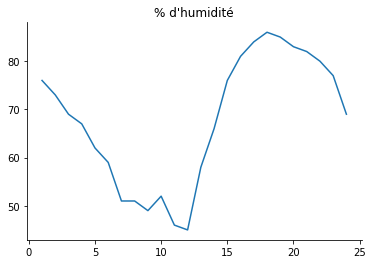

In [268]:
%matplotlib inline
import seaborn as sns
df.Humidité.plot(title="% d'humidité")
sns.despine()

In [270]:
df["Temp"]=df["Temp"].astype(float)

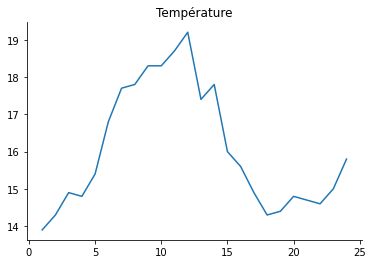

In [271]:
df.Temp.plot(title="Température")
sns.despine()

<AxesSubplot:label='a1350fe4-aff9-4610-bf62-dba3b8b8bcc2', ylabel='Humidité'>

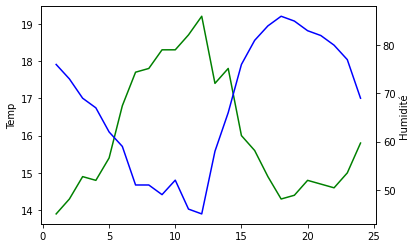

In [272]:
import matplotlib.pyplot as plt
sns.lineplot(data=df.Temp, color="g")
ax2 = plt.twinx()
sns.lineplot(data=df.Humidité, color="b", ax=ax2)


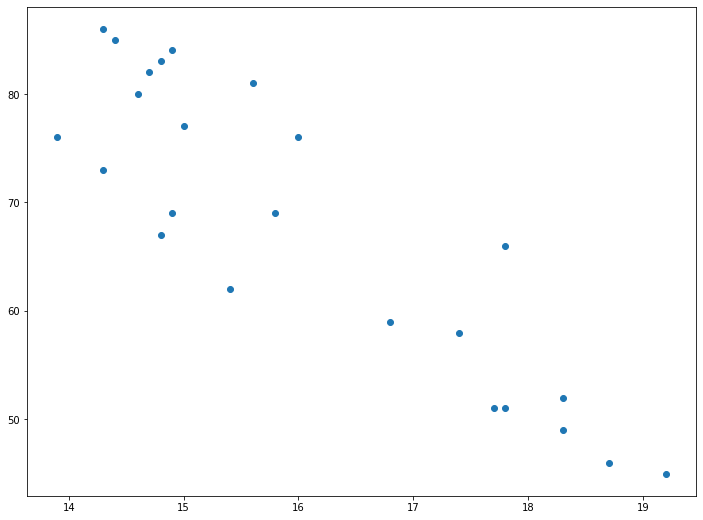

In [273]:
## Regression linéaire

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data
#data = pd.read_csv('data.csv')

#X = df.iloc[:, 1]
#Y = df.iloc[:, 4]

X = df.Temp
Y = df.Humidité

plt.scatter(X, Y)
plt.show()

In [274]:
X,Y

(1     13.9
 2     14.3
 3     14.9
 4     14.8
 5     15.4
 6     16.8
 7     17.7
 8     17.8
 9     18.3
 10    18.3
 11    18.7
 12    19.2
 13    17.4
 14    17.8
 15    16.0
 16    15.6
 17    14.9
 18    14.3
 19    14.4
 20    14.8
 21    14.7
 22    14.6
 23    15.0
 24    15.8
 Name: Temp, dtype: float64,
 1     76.0
 2     73.0
 3     69.0
 4     67.0
 5     62.0
 6     59.0
 7     51.0
 8     51.0
 9     49.0
 10    52.0
 11    46.0
 12    45.0
 13    58.0
 14    66.0
 15    76.0
 16    81.0
 17    84.0
 18    86.0
 19    85.0
 20    83.0
 21    82.0
 22    80.0
 23    77.0
 24    69.0
 Name: Humidité, dtype: float64)

In [275]:
# Building the model
X_mean = np.mean(X)
Y_mean = np.mean(Y)

num = 0
den = 0
for i in range(1,len(X)+1):
    print(i)
    num += (X[i] - X_mean)*(Y[i] - Y_mean)
    den += (X[i] - X_mean)**2
m = num / den
c = Y_mean - m*X_mean

print (m, c)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
-7.3019365037544475 185.04859702279018


In [276]:
# Making predictions
Y_pred = m*X + c
Y_pred


1     83.551680
2     80.630905
3     76.249743
4     76.979937
5     72.598775
6     62.376064
7     55.804321
8     55.074127
9     51.423159
10    51.423159
11    48.502384
12    44.851416
13    57.994902
14    55.074127
15    68.217613
16    71.138388
17    76.249743
18    80.630905
19    79.900711
20    76.979937
21    77.710130
22    78.440324
23    75.519549
24    69.678000
Name: Temp, dtype: float64

In [277]:
[min(X), max(X)]

[13.9, 19.2]

In [278]:
[min(Y_pred), max(Y_pred)]

[44.85141615070478, 83.55167962060335]

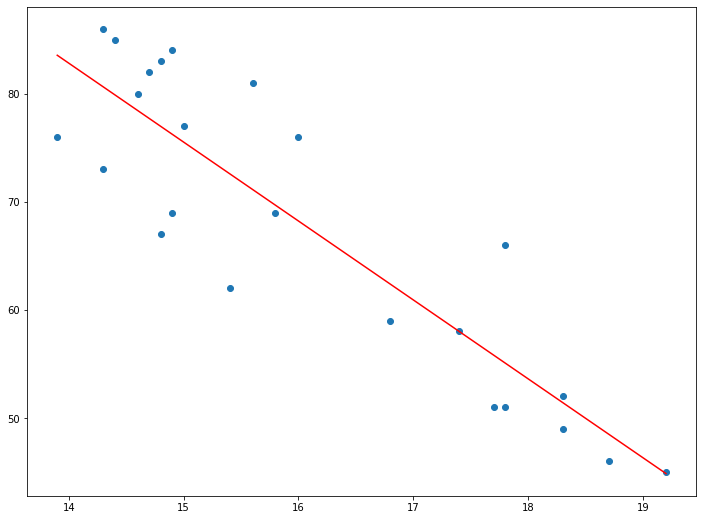

In [279]:

plt.scatter(X, Y) # actual
# plt.scatter(X, Y_pred, color='red')
plt.plot([min(X), max(X)], [max(Y_pred), min(Y_pred)], color='red') # predicted
plt.show()

In [ ]:
!pip install sklearn

In [280]:

!pip install bs4

## 2.5) Sélénium

In [ ]:
!pip install selenium

In [3]:
import selenium
from selenium import webdriver
path   = "./chromedriver"
driver = webdriver.Chrome(executable_path=path)

In [4]:
url_insta = "https://www.instagram.com/accounts/login/?hl=fr&source=auth_switcher"
driver.get(url_insta)

In [10]:
USER_ID=""
USER_PASSWORD=""
css_selector = "input[name='username']"
input_name = driver.find_element_by_css_selector(css_selector)
input_name.send_keys(USER_ID)

In [11]:
css_selector = "input[name='password']"
input_name = driver.find_element_by_css_selector(css_selector)
input_name.send_keys(USER_PASSWORD)

In [12]:
css_selector = "button[type='submit']"
button       = driver.find_element_by_css_selector(css_selector)
button.click()

In [23]:
hashtag = '#esilv'

In [29]:
# Methode css selector : clic droit inspecter...
#css_selector = "> > >input[placeholder='Rechercher']"
#search_bar = driver.find_element_by_css_selector(css_selector)


# Methode XPATH : clic droit inspecter 
# PUIS clic droit sur l'élément dans le code et "copy full XPATH"
xpath="/html/body/div[1]/section/nav/div[2]/div/div/div[2]/input"
search_bar = driver.find_element_by_xpath(xpath)


In [30]:
search_bar.clear()


In [31]:
search_bar.send_keys(hashtag)

In [32]:
from selenium.webdriver.common.keys import Keys 
search_bar.send_keys(Keys.ENTER)

In [33]:
## sometimes we have to press multiple times Enter...
import time
time.sleep(3)
for i in range(3):
    try: search_bar.send_keys(Keys.ENTER)
    except: pass

In [ ]:
<img 
alt="Photo by RF in Pôle Universitaire Léonard de Vinci with @raphael__fhr, and @lajoutedevinci. L’image contient peut-être&nbsp;: 2 personnes, personnes debout et intérieur, texte qui dit ’Débat LEDNARO . ASSOCIA EDÉBAT 'ÉLOQUENCE La Joute de Vinci &quot;A vos fleurets.. Joutez!&quot; LOQUENCE DÉBATS CÈS FORMATIONS Rejoignez nous! in’." class="FFVAD" 
decoding="auto" sizes="238.328125px" 
srcset="https://scontent-cdg2-1.cdninstagram.com/v/t51.2885-15/e35/c0.180.1440.1440a/s150x150/92607916_657383165112264_3875919200175555651_n.jpg?_nc_ht=scontent-cdg2-1.cdninstagram.com&amp;_nc_cat=100&amp;_nc_ohc=Dk7NFb8CaawAX8ekA7D&amp;tp=16&amp;oh=a5e3c4201a7e3b49552552bdbfe7f6c6&amp;oe=5FD4FD25 150w,https://scontent-cdg2-1.cdninstagram.com/v/t51.2885-15/e35/c0.180.1440.1440a/s240x240/92607916_657383165112264_3875919200175555651_n.jpg?_nc_ht=scontent-cdg2-1.cdninstagram.com&amp;_nc_cat=100&amp;_nc_ohc=Dk7NFb8CaawAX8ekA7D&amp;tp=16&amp;oh=3011273da770ecfdeb8f9377235a82e9&amp;oe=5FD8456F 240w,https://scontent-cdg2-1.cdninstagram.com/v/t51.2885-15/e35/c0.180.1440.1440a/s320x320/92607916_657383165112264_3875919200175555651_n.jpg?_nc_ht=scontent-cdg2-1.cdninstagram.com&amp;_nc_cat=100&amp;_nc_ohc=Dk7NFb8CaawAX8ekA7D&amp;tp=16&amp;oh=43293fd3607764ce1a6b04c4d76e6c02&amp;oe=5FD83ED5 320w,https://scontent-cdg2-1.cdninstagram.com/v/t51.2885-15/e35/c0.180.1440.1440a/s480x480/92607916_657383165112264_3875919200175555651_n.jpg?_nc_ht=scontent-cdg2-1.cdninstagram.com&amp;_nc_cat=100&amp;_nc_ohc=Dk7NFb8CaawAX8ekA7D&amp;tp=16&amp;oh=86cf5f52a1dd6bd0c73b09ddb4c44193&amp;oe=5FD6B68F 480w,https://scontent-cdg2-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/c0.180.1440.1440a/s640x640/92607916_657383165112264_3875919200175555651_n.jpg?_nc_ht=scontent-cdg2-1.cdninstagram.com&amp;_nc_cat=100&amp;_nc_ohc=Dk7NFb8CaawAX8ekA7D&amp;_nc_tp=24&amp;oh=72e9f457745d18db920194ff5c7da2f7&amp;oe=5FD6F470 640w" src="https://scontent-cdg2-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/c0.180.1440.1440a/s640x640/92607916_657383165112264_3875919200175555651_n.jpg?_nc_ht=scontent-cdg2-1.cdninstagram.com&amp;_nc_cat=100&amp;_nc_ohc=Dk7NFb8CaawAX8ekA7D&amp;_nc_tp=24&amp;oh=72e9f457745d18db920194ff5c7da2f7&amp;oe=5FD6F470" 
style="object-fit: cover;">

In [35]:
css_selector = "img"
images       = driver.find_elements_by_css_selector(css_selector)
img_srcset   = [image.get_attribute('srcset') for image in images]
urls_images  = [x.split(" ")[0] for x in img_srcset]
urls_images
#[url for url in urls_images if re.search(r"5FC4A050",url)]

['',
 'https://scontent-cdg2-1.cdninstagram.com/v/t51.2885-15/e35/c0.180.1440.1440a/s150x150/92607916_657383165112264_3875919200175555651_n.jpg?_nc_ht=scontent-cdg2-1.cdninstagram.com&_nc_cat=100&_nc_ohc=Dk7NFb8CaawAX8ekA7D&tp=16&oh=a5e3c4201a7e3b49552552bdbfe7f6c6&oe=5FD4FD25',
 'https://scontent-cdg2-1.cdninstagram.com/v/t51.2885-15/e35/c236.0.608.608a/s150x150/98137656_299212041096650_1700362776187857038_n.jpg?_nc_ht=scontent-cdg2-1.cdninstagram.com&_nc_cat=102&_nc_ohc=7CljC2AKDdwAX-InPoA&tp=16&oh=8385d5438f4071d54b548fdc924045fc&oe=5FD51529',
 'https://scontent-cdg2-1.cdninstagram.com/v/t51.2885-15/e35/c236.0.608.608a/s150x150/82074741_679004282638742_6756413213560284117_n.jpg?_nc_ht=scontent-cdg2-1.cdninstagram.com&_nc_cat=102&_nc_ohc=78YVrlDmhMAAX_3U3ql&tp=16&oh=1c1cc32d7889979fc92e0914b88af3b9&oe=5FD673E4',
 'https://scontent-cdt1-1.cdninstagram.com/v/t51.2885-15/e15/c180.0.720.720a/s150x150/62429083_2313622338907933_4956030942903488390_n.jpg?_nc_ht=scontent-cdt1-1.cdninstagram.

In [36]:
urls_images = list(filter(lambda url: url.startswith("http"), urls_images))
urls_images

['https://scontent-cdg2-1.cdninstagram.com/v/t51.2885-15/e35/c0.180.1440.1440a/s150x150/92607916_657383165112264_3875919200175555651_n.jpg?_nc_ht=scontent-cdg2-1.cdninstagram.com&_nc_cat=100&_nc_ohc=Dk7NFb8CaawAX8ekA7D&tp=16&oh=a5e3c4201a7e3b49552552bdbfe7f6c6&oe=5FD4FD25',
 'https://scontent-cdg2-1.cdninstagram.com/v/t51.2885-15/e35/c236.0.608.608a/s150x150/98137656_299212041096650_1700362776187857038_n.jpg?_nc_ht=scontent-cdg2-1.cdninstagram.com&_nc_cat=102&_nc_ohc=7CljC2AKDdwAX-InPoA&tp=16&oh=8385d5438f4071d54b548fdc924045fc&oe=5FD51529',
 'https://scontent-cdg2-1.cdninstagram.com/v/t51.2885-15/e35/c236.0.608.608a/s150x150/82074741_679004282638742_6756413213560284117_n.jpg?_nc_ht=scontent-cdg2-1.cdninstagram.com&_nc_cat=102&_nc_ohc=78YVrlDmhMAAX_3U3ql&tp=16&oh=1c1cc32d7889979fc92e0914b88af3b9&oe=5FD673E4',
 'https://scontent-cdt1-1.cdninstagram.com/v/t51.2885-15/e15/c180.0.720.720a/s150x150/62429083_2313622338907933_4956030942903488390_n.jpg?_nc_ht=scontent-cdt1-1.cdninstagram.com&_

In [37]:
from urllib.request import urlretrieve as download
[download(url, f"image_{indice}.jpg") for  indice,url in enumerate(urls_images) ]

[('image_0.jpg', <http.client.HTTPMessage at 0x1e99056acd0>),
 ('image_1.jpg', <http.client.HTTPMessage at 0x1e99056ae20>),
 ('image_2.jpg', <http.client.HTTPMessage at 0x1e99056a5e0>),
 ('image_3.jpg', <http.client.HTTPMessage at 0x1e99056aa30>),
 ('image_4.jpg', <http.client.HTTPMessage at 0x1e99056af40>),
 ('image_5.jpg', <http.client.HTTPMessage at 0x1e99056ac10>),
 ('image_6.jpg', <http.client.HTTPMessage at 0x1e99056a2b0>),
 ('image_7.jpg', <http.client.HTTPMessage at 0x1e99056ad30>),
 ('image_8.jpg', <http.client.HTTPMessage at 0x1e99056aa00>),
 ('image_9.jpg', <http.client.HTTPMessage at 0x1e99056aeb0>),
 ('image_10.jpg', <http.client.HTTPMessage at 0x1e99056aee0>),
 ('image_11.jpg', <http.client.HTTPMessage at 0x1e9904a6dc0>),
 ('image_12.jpg', <http.client.HTTPMessage at 0x1e9904a66d0>),
 ('image_13.jpg', <http.client.HTTPMessage at 0x1e9904a69a0>),
 ('image_14.jpg', <http.client.HTTPMessage at 0x1e9904a67c0>),
 ('image_15.jpg', <http.client.HTTPMessage at 0x1e9904a6e50>),
 (

In [38]:
from PIL import Image

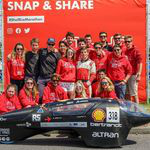

In [39]:
Image.open(f"image_20.jpg") 

In [1]:
# NOW LET'S SCROLL THE PAGE TO LOAD REMAINING IAMGES

In [40]:
driver.execute_script("return document.body.scrollHeight")

5401

In [41]:
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

In [42]:
driver.execute_script("return document.body.scrollHeight")

6713

In [43]:
# We're doing this to be sure to wait enough time for the divs to load.

from selenium.webdriver.common.by import By #use the method to select
from selenium.webdriver.support.ui import WebDriverWait #enables to wait until condition is fullfilled or just until a timeout exception is returned
from selenium.webdriver.support import expected_conditions as ec #enables to create the conditions


WebDriverWait(driver, timeout=10).until(ec.visibility_of_all_elements_located((By.CSS_SELECTOR, "div[class='v1Nh3 kIKUG  _bz0w']")))

[<selenium.webdriver.remote.webelement.WebElement (session="0787496a4e774415be1545414751c62f", element="0b89b4df-056e-4784-90c4-2e8f349ca24d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0787496a4e774415be1545414751c62f", element="4e4ba1ee-d2a8-494c-82f2-f146b94176d6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0787496a4e774415be1545414751c62f", element="72ab06a7-30ab-448d-a299-aa0ecd33fd9d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0787496a4e774415be1545414751c62f", element="aad961cb-2ab7-47e9-a8ba-f293bc7101d4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0787496a4e774415be1545414751c62f", element="e7151ca1-b2e4-4c36-b9c5-0c121c0390a4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0787496a4e774415be1545414751c62f", element="9a5f7f8d-f7d2-483f-89a9-5df310844791")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0787496a4e774415be1545414751c62f", element="d583df1d-2572-4bf9-b0ab-f6

## les Decorateurs

In [ ]:
# Decorateur https://realpython.com/primer-on-python-decorators/
# Pour résumer : une fonction qui va en executer une autre, et souvent faire des choses avant et /ou après.

# https://gillesfabio.com/blog/2010/07/31/python-et-les-callables/

In [44]:
class NbCallFunction:
    """ This is a decorator to count the number of times a function has been called
    It will be used to retrieve the image number to put it in working directory"""
    def __init__(self, function):
        self.callNumber = 0
        self.function = function
    def __call__(self, *args, **kwargs):
        ## onCall
        self.callNumber += 1
        return self.function(*args, **kwargs)
    
@NbCallFunction
def helloworld():
    print('hello-world')
    

helloworld.callNumber

0

In [49]:
helloworld()


hello-world


In [50]:
helloworld.callNumber

4

## retour au scraping

In [31]:
@NbCallFunction
def download_img_from_link(string_url_img, hashtag_name):
    """ This function retrieve all the photos from the visible window"""
    import os
    import requests as req
    if not os.path.exists('data/'):
        os.mkdir('data/')
    string_path = 'data/'+ hashtag_name.lstrip('#') + str(download_img_from_link.callNumber) + '.jpg'
    with open(string_path, 'wb') as file:
        response = req.get(string_url_img)
        print(response) if (not response.ok) else file.write(response.content)
    print (string_url_img)
        

##==== the while loop idea using the last_height and new_height is from @Artjom B. on Stackoverflow \
##==== i find it quite straightforward and useful ====##
SLEEP_EACH_SCROLL = 3
last_height       = driver.execute_script("return document.body.scrollHeight") # Get scroll height executing js script
count, limit      = 0, 10 # if we want to stop
s = set()

import regex as re
import time
while count < limit:
    ## Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(SLEEP_EACH_SCROLL)
     
    ## Retrieve the divs list
    all_divs = driver.find_elements(By.CSS_SELECTOR, "div[class='v1Nh3 kIKUG  _bz0w']")
    
    ## important: in case the visible window overlapp with the former one, we don't want photos to get scrapped twice (so we say not in 's')
    selected_divs = [x for x in all_divs if x not in s]
    
    ## Retrieve each image srcset attribute in each div in the divs list
    img_srcset = [div.find_element(By.CSS_SELECTOR, "img").get_attribute('src') for div in selected_divs]
    
    ## Retrieve the correct image url from image srcset list
    pattern = re.compile('^http\S+')
    string_url_imgs = [re.match(pattern=pattern, string=x).group() for x in img_srcset]
    
    for string_url_img in string_url_imgs:
        download_img_from_link(string_url_img, hashtag)
        
    ## Calculate new scroll height and compare with last scroll height 
    ## ... (if the scrolling actually changed something)
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height
    count += 1 # count will be used for pagination afterwards
    
    s = set(all_divs) # Saving this list to avoid downloading again the same photos
    print("scrolling number : " + str(count) + " on limit : " + str(limit))
    print("number of photos downloaded : " + str(download_img_from_link.callNumber))
    if download_img_from_link.callNumber > 100:
        break

on incrémente1
https://scontent-cdg2-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/c91.0.1059.1059a/s640x640/122617978_828076814625004_2038024123486061487_n.jpg?_nc_ht=scontent-cdg2-1.cdninstagram.com&_nc_cat=104&_nc_ohc=dBZzdtFJTHoAX_1c1e1&_nc_tp=24&oh=d65a63b7865433c91ce2b412bdbe8b6b&oe=5FD6000E
on incrémente2
https://scontent-cdg2-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/c17.0.987.987a/s640x640/121416814_402539160751332_8937692521953855830_n.jpg?_nc_ht=scontent-cdg2-1.cdninstagram.com&_nc_cat=100&_nc_ohc=JIPmDbxC_lQAX88aHM6&_nc_tp=24&oh=1355e70c97a64c952d1864d162739597&oe=5FD3121E
on incrémente3
https://scontent-cdt1-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/c0.180.1440.1440a/s640x640/121674269_1285517811618627_7534128848642001517_n.jpg?_nc_ht=scontent-cdt1-1.cdninstagram.com&_nc_cat=103&_nc_ohc=g5IDPkNVqakAX-oCnNv&_nc_tp=24&oh=f914e02c9f5a8eadb08d69009bdea7a7&oe=5FD47EFC
on incrémente4
https://scontent-cdg2-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/c0.167.1394.1394a/s640x640/1

https://scontent-cdt1-1.cdninstagram.com/v/t51.2885-15/e35/124188085_370671740716026_4359792683865160926_n.jpg?_nc_ht=scontent-cdt1-1.cdninstagram.com&_nc_cat=106&_nc_ohc=LAWeNABYV7wAX9HkmWT&tp=18&oh=9e566cdd7990bc786c347f065df57076&oe=5FD26928
on incrémente30
https://scontent-cdg2-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/c0.147.1440.1440a/s640x640/124114901_483665285916664_2600107722138630054_n.jpg?_nc_ht=scontent-cdg2-1.cdninstagram.com&_nc_cat=104&_nc_ohc=tCAeBUH51ogAX_bc78W&_nc_tp=24&oh=92d0226f5045f5eeac469492197829e3&oe=5FD3EA9E
on incrémente31
https://scontent-cdg2-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/c0.129.1035.1035a/s640x640/124153699_268362634709848_2772701749783828223_n.jpg?_nc_ht=scontent-cdg2-1.cdninstagram.com&_nc_cat=104&_nc_ohc=gdgSaHp8hdoAX8D8NLj&_nc_tp=24&oh=7dccdd4e5b2d934d624c4448e38a0bfe&oe=5FD565FF
on incrémente32
https://scontent-cdg2-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/c0.180.1440.1440a/s640x640/124196689_828744771272935_5887289670940573462_n.

https://scontent-cdg2-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/s640x640/124670687_2440537792909172_6889337694770645252_n.jpg?_nc_ht=scontent-cdg2-1.cdninstagram.com&_nc_cat=108&_nc_ohc=9-1hfIOzSoMAX8eHqhc&_nc_tp=24&oh=27218672b4eee213b824106f02240250&oe=5FD36BBC
on incrémente59
https://scontent-cdg2-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/c240.0.960.960a/s640x640/124692592_113169990476990_3296416187880643151_n.jpg?_nc_ht=scontent-cdg2-1.cdninstagram.com&_nc_cat=102&_nc_ohc=jkLoReHTlR4AX9ot3_Q&_nc_tp=24&oh=da5bde723099557b4ca2f6ffdb06e051&oe=5FD3C1FA
on incrémente60
https://scontent-cdg2-1.cdninstagram.com/v/t51.2885-15/e35/124650124_422643279130355_1003950904893487432_n.jpg?_nc_ht=scontent-cdg2-1.cdninstagram.com&_nc_cat=111&_nc_ohc=9hW6FhcG9g8AX_QlOqf&tp=18&oh=7cbc77626b563a1bc65d9c0378703c42&oe=5FD41F93
on incrémente61
https://scontent-cdg2-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/s640x640/124145024_192095242465304_6736046136253420615_n.jpg?_nc_ht=scontent-cdg2-1.cdninstagr

https://scontent-cdg2-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/s640x640/124194402_1074824243033654_1135120866052884805_n.jpg?_nc_ht=scontent-cdg2-1.cdninstagram.com&_nc_cat=102&_nc_ohc=JgKJi7HOEiMAX-kRck6&_nc_tp=24&oh=5ab731297cbdd6eec4b87cb7504f2d50&oe=5FD45182
on incrémente89
https://scontent-cdt1-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/s640x640/124096395_3401026423268305_8251878321024077715_n.jpg?_nc_ht=scontent-cdt1-1.cdninstagram.com&_nc_cat=101&_nc_ohc=tB2b5XcIBNcAX-fmgXr&_nc_tp=24&oh=3526ebe15b8b9d3167779504eb29f6d7&oe=5FD3EF80
on incrémente90
https://scontent-cdg2-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/s640x640/124638181_217826356359808_1705282840961990528_n.jpg?_nc_ht=scontent-cdg2-1.cdninstagram.com&_nc_cat=104&_nc_ohc=kdKOKvP2zCYAX-BVS47&_nc_tp=24&oh=d2ba8712e53574df4cd2c851982eb7cf&oe=5FD5E9C5
scrolling number : 4 on limit : 10
number of photos downloaded : 90
on incrémente91
https://scontent-cdg2-1.cdninstagram.com/v/t51.2885-15/e35/124013105_721377098586847_20